# Final Data Science Project: Unemployment Analysis (1976-2018)

In this project, we aim to conduct a comprehensive analysis of unemployment rates across different US states from 1976 to 2018. Our objective is to uncover historical patterns, factors influencing unemployment rates, and potential indicators of economic downturns or recoveries. The insights gained from this analysis will be valuable for policymakers, economists, and researchers, impacting strategic decisions related to labor markets and economic development.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

## Task 1: Data Loading and Overview

The first step in our analysis is to load the dataset into a DataFrame and get an overview of its structure.

In [46]:
df = pd.read_csv('Unemployment by State 1976 - 2018.csv')
df.head()


,index,Month and Year,State,Civilian Population,Total Labor Force,Percent of Population,Employed - Total,Employed - Percent of Population,Unemployed - Total,Unemployed - Percent of Labor Force
0,0,January 1976,Alabama,2605000,1492409,57.3,1392154,53.4,100255,6.7
1,1,January 1976,Alaska,232000,159154,68.6,147809,63.7,11345,7.1
2,2,January 1976,Arizona,1621000,972413,60.0,872738,53.8,99675,10.3
3,3,January 1976,Arkansas,1536000,882835,57.5,817756,53.2,65079,7.4
4,4,January 1976,California,15621000,9781720,62.6,8892663,56.9,889057,9.1


In [47]:
# Create a copy of the DataFrame for data cleaning
df_clean = df.copy()

## Task 2: Data Cleaning

Before diving into analysis, it's crucial to clean the data. This includes handling missing or duplicate values, addressing any inconsistencies or outliers, ensuring consistent data types, converting date columns to datetime format, and adjusting column names for easier coding.


In [48]:
# Check for missing values
print("Missing values:\n", df_clean.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df_clean.duplicated().sum())

Missing values:
 index                                  0
Month and Year                         0
State                                  0
Civilian Population                    0
Total Labor Force                      0
Percent of Population                  0
Employed - Total                       0
Employed - Percent of Population       0
Unemployed - Total                     0
Unemployed - Percent of Labor Force    0
dtype: int64

Number of duplicate rows: 0


In [49]:
# dropping duplicates
df_clean.drop_duplicates(inplace=True)

# dropping rows with missing values
df_clean.dropna(inplace=True)

In [50]:
# Display data types to confirm changes
df_clean.dtypes

index                                    int64
Month and Year                          object
State                                   object
Civilian Population                      int64
Total Labor Force                        int64
Percent of Population                  float64
Employed - Total                         int64
Employed - Percent of Population       float64
Unemployed - Total                       int64
Unemployed - Percent of Labor Force    float64
dtype: object

In [71]:
df_clean.columns = [col.replace(' ', '_').lower() for col in df_clean.columns]
df_clean.columns = df_clean.columns.str.replace('-', '_')
print(df_clean.columns)

Index(['index', 'month_and_year', 'state', 'civilian_population',
       'total_labor_force', 'percent_of_population', 'employed___total',
       'employed___percent_of_population', 'unemployed___total',
       'unemployed___percent_of_labor_force', 'year',
       'yearly_change_in_unemployment'],
      dtype='object')


## Task 3: Descriptive Statistics

To understand the distribution of unemployment rates and other key variables across states and over the years, we will generate summary statistics and explore the distribution of these variables.


In [52]:
#summary statistics for numerical columns
df_clean.describe()

,index,civilian_population,total_labor_force,percent_of_population,employed___total,employed___percent_of_population,unemployed___total,unemployed___percent_of_labor_force
count,26316.000000,2.631600e+04,2.631600e+04,26316.000000,2.631600e+04,26316.000000,2.631600e+04,26316.000000
mean,13157.500000,4.051173e+06,2.635714e+06,65.944646,2.471534e+06,62.043057,1.641804e+05,5.968722
std,7596.919178,4.541753e+06,2.923081e+06,4.152671,2.728742e+06,4.619893,2.113797e+05,2.094903
min,0.000000,2.320000e+05,1.589610e+05,50.300000,1.476660e+05,42.200000,5.488000e+03,2.000000
25%,6578.750000,1.049000e+06,6.897202e+05,63.200000,6.523390e+05,59.000000,3.587050e+04,4.500000
50%,13157.500000,2.719866e+06,1.764892e+06,66.300000,1.669850e+06,62.300000,1.010620e+05,5.600000
75%,19736.250000,4.781626e+06,3.165811e+06,68.800000,3.000212e+06,65.400000,1.890155e+05,7.100000
max,26315.000000,3.135768e+07,1.959304e+07,75.600000,1.877918e+07,73.100000,2.253816e+06,18.800000


## Task 4: Time Series Analysis

We will visualize the overall trend in unemployment rates over the years and identify any significant fluctuations or patterns. Additionally, we'll explore the seasonality in unemployment rates.


/Users/kiki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kiki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/gs/_8hlmzn17p763ggbbr6clf6m0000gn/T/ipykernel_32246/1662029793.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['month_and_year'] = pd.to_datetime(df_clean['month_and_year'])


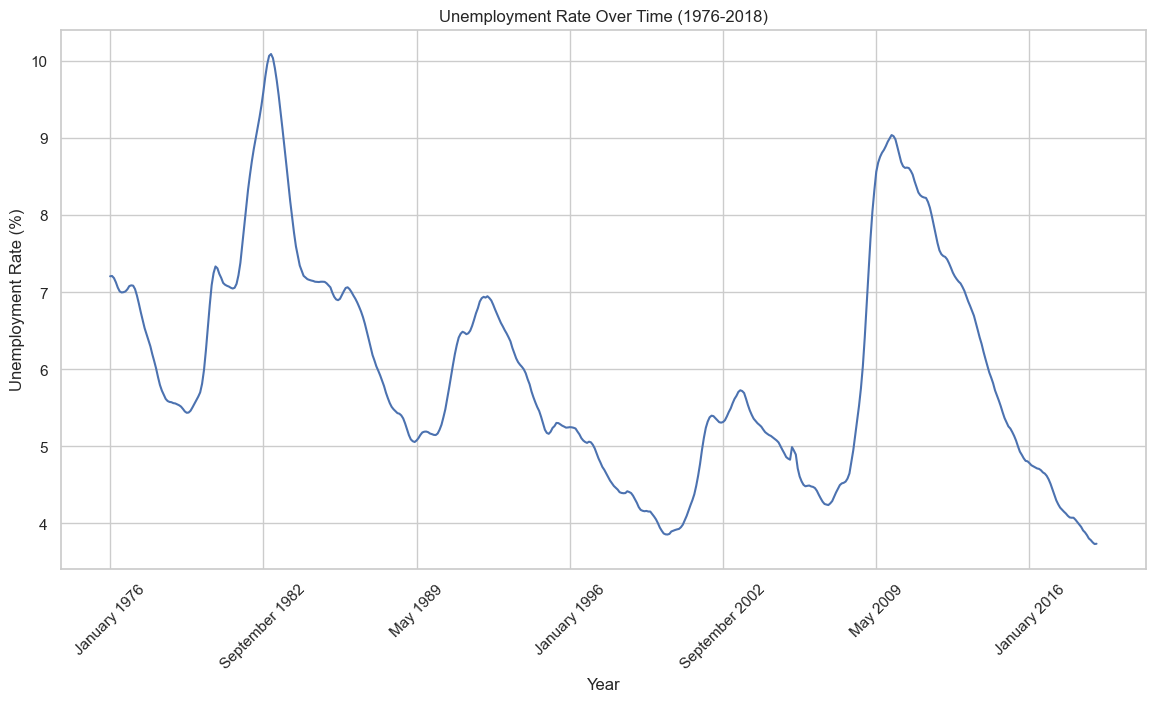

In [55]:
# Set the figure size and plot style
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plotting the unemployment rate over time with the updated column name
sns.lineplot(data=df_clean, x='month_and_year', y='unemployed___percent_of_labor_force', estimator='mean', errorbar=None)

plt.title('Unemployment Rate Over Time (1976-2018)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

# Adjusting the x-axis to display years more clearly
# Convert 'month_and_year' to datetime if it's not already
df_clean['month_and_year'] = pd.to_datetime(df_clean['month_and_year'])

# Generate a list of years to use as labels
years = df_clean['month_and_year'].dt.year.unique()


plt.gca().xaxis.set_major_locator(MaxNLocator(prune='both', nbins=len(years)//5))

# Rotate dates for better visibility
plt.xticks(rotation=45)

plt.show()

## Task 5: State-wise Comparison

Analyzing and comparing unemployment rates among different states to identify those with consistently high or low unemployment. We'll also create a table showing the average unemployment rate per state, ordered from higher to lower.


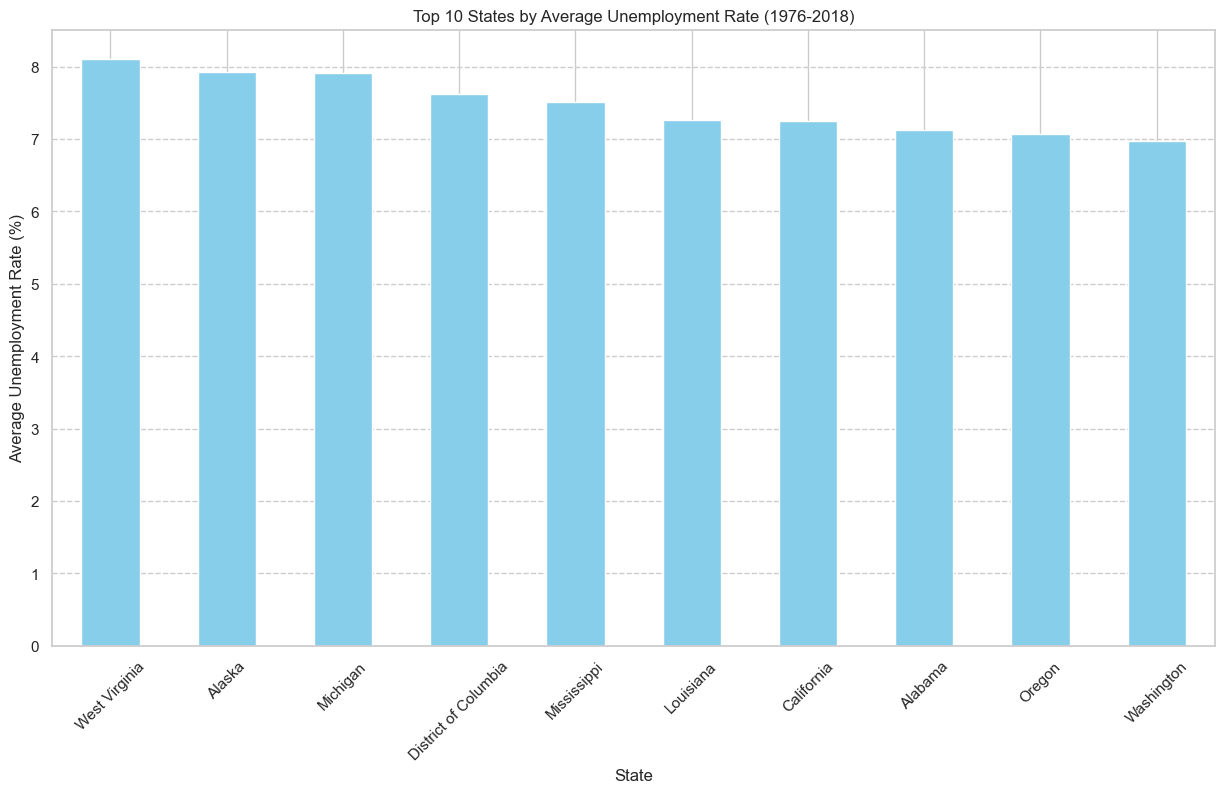

In [56]:
top_states = df_clean.groupby('state')['unemployed___percent_of_labor_force'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
top_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Average Unemployment Rate (1976-2018)')
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Task 6: Labor Force Participation

The labor force participation rate is a crucial indicator of economic health, representing the proportion of the population either employed or actively seeking employment. Understanding how labor force participation correlates with unemployment rates can provide insights into the dynamics of the job market. In this task, we will explore the relationship between the size of the labor force, the civilian population, and unemployment rates.


                                     total_labor_force  civilian_population  \
total_labor_force                             1.000000             0.998244   
civilian_population                           0.998244             1.000000   
unemployed___percent_of_labor_force           0.112192             0.126151   

                                     unemployed___percent_of_labor_force  
total_labor_force                                               0.112192  
civilian_population                                             0.126151  
unemployed___percent_of_labor_force                             1.000000  


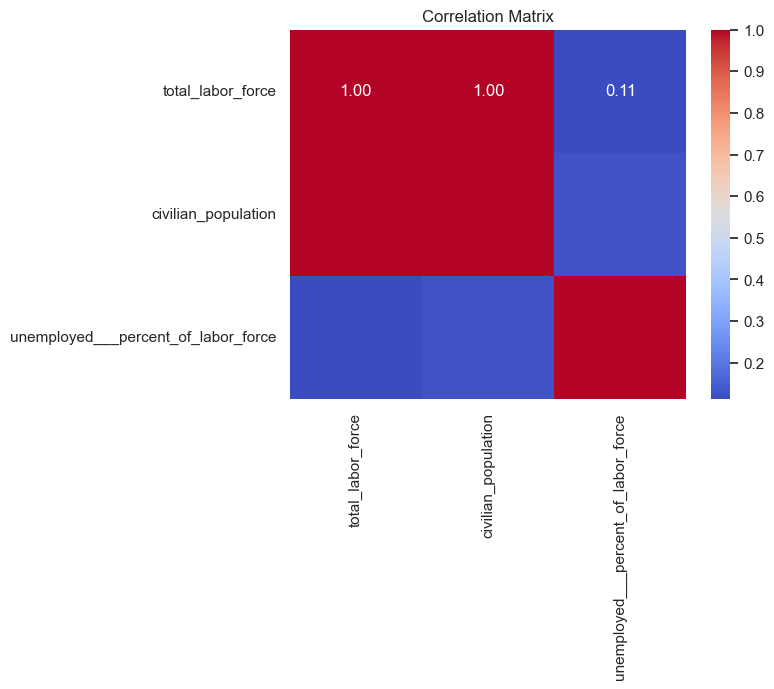

In [70]:
correlation_matrix = df_clean[['total_labor_force', 'civilian_population', 'unemployed___percent_of_labor_force']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/Users/kiki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kiki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


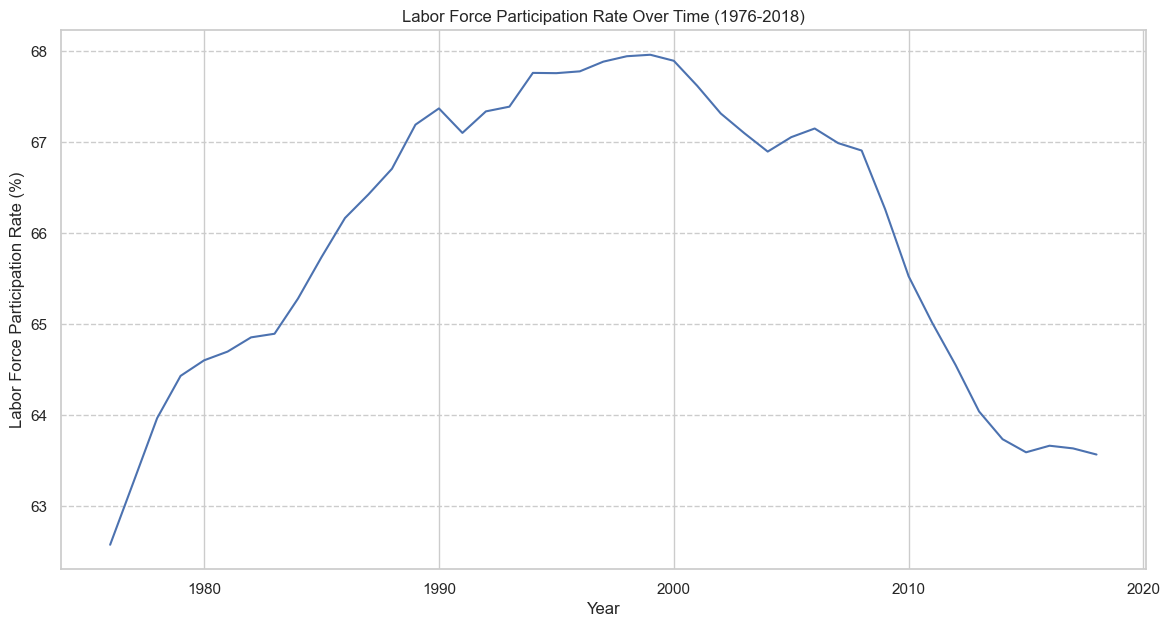

In [58]:
# Plotting the labor force participation rate over time
plt.figure(figsize=(14, 7))
sns.lineplot(x=labor_force_participation_rate.index, y=labor_force_participation_rate.values)
plt.title('Labor Force Participation Rate Over Time (1976-2018)')
plt.xlabel('Year')
plt.ylabel('Labor Force Participation Rate (%)')
plt.grid(axis='y', linestyle='--')
plt.show()

## Task 7: Data Exploration

Deep diving into the dataset allows us


/Users/kiki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


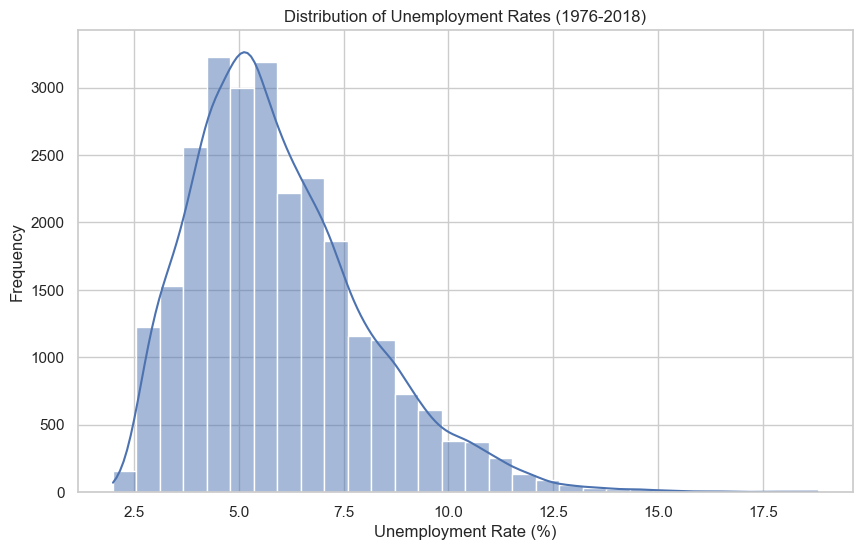

In [41]:
# Univariate analysis of unemployment rates
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['unemployed___percent_of_labor_force'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rates (1976-2018)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

/Users/kiki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kiki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


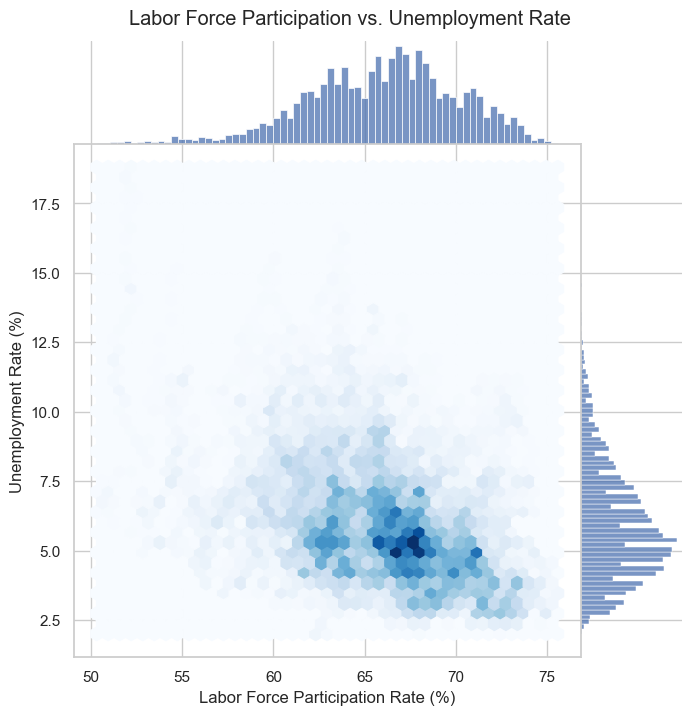

In [62]:
# Bivariate analysis of unemployment rate and labor force participation
sns.jointplot(data=df_clean, x='percent_of_population', y='unemployed___percent_of_labor_force', kind="hex", height=7, space=0, gridsize=40, cmap='Blues')
plt.suptitle('Labor Force Participation vs. Unemployment Rate', y=1.02)
plt.xlabel('Labor Force Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [67]:
# Calculating the standard deviation of yearly changes in unemployment rates for each state
volatility = df_clean.groupby('state')['yearly_change_in_unemployment'].std().sort_values(ascending=False)

# Displaying states with the highest volatility in unemployment rate changes
print(volatility.head(10))

state
Louisiana         0.358990
Michigan          0.192872
Mississippi       0.188485
West Virginia     0.176370
North Carolina    0.169103
Alabama           0.156749
Indiana           0.156129
Oregon            0.151033
Arizona           0.150569
Georgia           0.150462
Name: yearly_change_in_unemployment, dtype: float64


/Users/kiki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kiki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


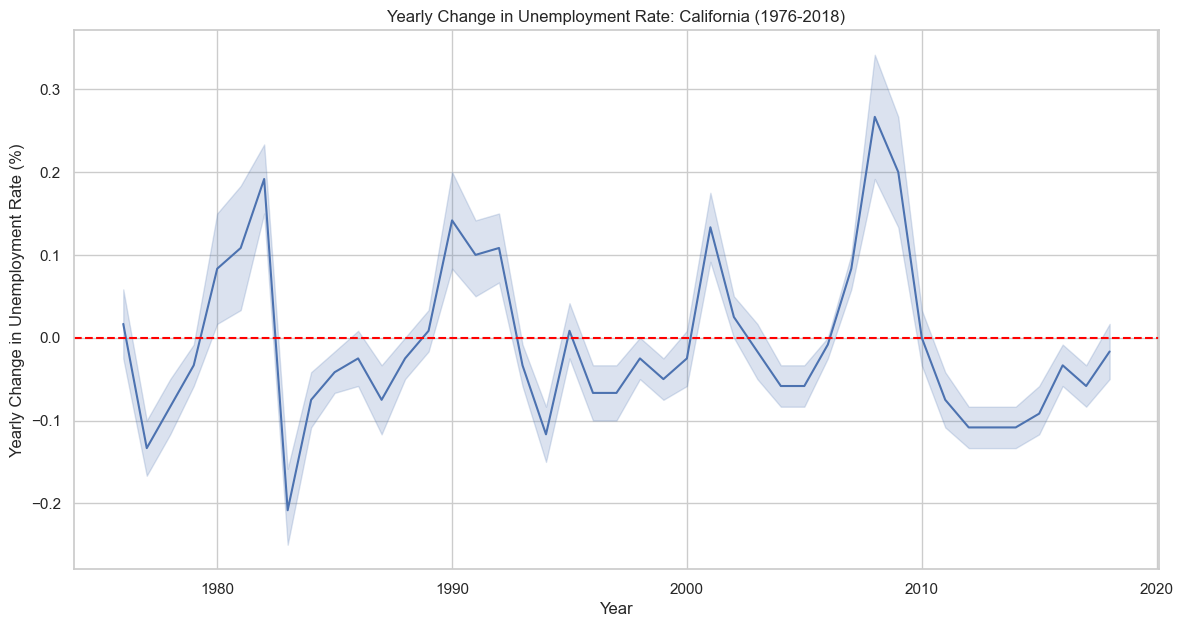

In [69]:
# Example: Visualizing yearly changes in unemployment rates for a specific state
state = 'California'
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_clean[df_clean['state'] == state], x='year', y='yearly_change_in_unemployment')
plt.title(f'Yearly Change in Unemployment Rate: {state} (1976-2018)')
plt.xlabel('Year')
plt.ylabel('Yearly Change in Unemployment Rate (%)')
plt.axhline(0, color='red', linestyle='--') 
plt.show()

## Conclusions and Recommendations
Our comprehensive analysis of the "Unemployment by State 1976 - 2018" dataset has revealed several key insights into the historical patterns and dynamics of unemployment across the United States. By examining trends over time, conducting state-wise comparisons, and exploring the relationship between labor force participation and unemployment rates, we have gained a deeper understanding of the factors influencing unemployment and the economic health of different regions.

## Key Findings
- Time Series Analysis: The overall trend in unemployment rates shows periodic fluctuations that correspond with known economic cycles, such as recessions and periods of economic expansion. Notably, spikes in unemployment rates align with historical economic downturns.

- State-wise Comparison: There is significant variability in unemployment rates among states. Some states, such as West Virginia and Alaska, have consistently higher unemployment rates, whereas others have managed to maintain lower rates over the years. This variability suggests that local economic conditions and policies play a crucial role in determining unemployment rates.

- Labor Force Participation: The analysis indicated a correlation between labor force participation rates and unemployment rates. Regions with higher participation rates often showed lower unemployment rates, underscoring the importance of engaging the working-age population in the labor market.

- Volatility and Change: The yearly change in unemployment rates highlighted the volatility of the labor market in certain states. Understanding the factors contributing to this volatility could be key to developing more resilient economies.

## Recommendations
Based on our findings, we recommend the following actions for policymakers and stakeholders:

- Targeted Economic Policies: Develop and implement economic policies tailored to the specific needs and challenges of states with historically higher unemployment rates. This might include job creation programs, investment in education and training, and support for key industries.

- Labor Force Engagement: Invest in programs aimed at increasing labor force participation, such as childcare support, workforce re-entry programs, and incentives for businesses to offer flexible work arrangements.

- Economic Diversification: Encourage economic diversification in regions heavily dependent on single industries to build more resilient local economies capable of withstanding industry-specific downturns.

- Continuous Monitoring and Research: Invest in ongoing research to better understand the dynamics of the labor market and the effectiveness of implemented policies. This should include monitoring changes in unemployment rates and labor force participation, as well as conducting detailed segmentation analyses to identify demographic groups that may be disproportionately affected by unemployment.
